In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# Carregar o conjunto de dados Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Adicionar uma dimensão de canal para as imagens (necessário para a CNN)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Definir a arquitetura da CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Acurácia no conjunto de teste: {test_acc:.2f}')


2024-08-27 08:27:34.582030: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 08:27:35.124932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 08:27:35.267007: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 08:27:35.303120: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 08:27:35.542562: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.7164 - loss: 0.7733 - val_accuracy: 0.8490 - val_loss: 0.4187
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8659 - loss: 0.3626 - val_accuracy: 0.8769 - val_loss: 0.3463
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8889 - loss: 0.3033 - val_accuracy: 0.8871 - val_loss: 0.3178
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9005 - loss: 0.2734 - val_accuracy: 0.8892 - val_loss: 0.3025
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9111 - loss: 0.2406 - val_accuracy: 0.8937 - val_loss: 0.2842
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9173 - loss: 0.2217 - val_accuracy: 0.9011 - val_loss: 0.2702
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9264 - loss: 0.2011 - val_accuracy: 0.9109 - val_loss: 0.2577
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9319 - loss: 0.1806 - 

# Exercício 2
## 3ª Lista de Redes Neurais
### by Lorran de Araújo Durães Soares

# Imports

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import cv2
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import cv2

np.random.seed(42) # setando semente

# Pré processamento:

In [2]:
(data_train, label_train), (data_test, label_test) = cifar10.load_data()

# concatena os dados
x_all = np.concatenate((data_train, data_test), axis=0)
y_all = np.concatenate((label_train, label_test), axis=0)

In [3]:
categories = [0, 1]  # airplane, car
train_filter = np.isin(y_all, categories)

x_filt, y_filt = x_all[train_filter.flatten()], y_all[train_filter.flatten()]

In [4]:
# função para plotar imagem exemplo posteriormente
def plot_image(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

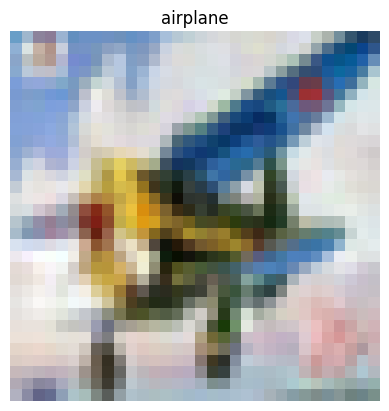

In [5]:
category_labels = {0: 'airplane', 1: 'car'}
num_imagem = 1254
example_image = x_filt[num_imagem]
example_label = y_filt[num_imagem][0]

plot_image(example_image, category_labels[example_label])

In [6]:
x_filt.shape

(12000, 32, 32, 3)

In [7]:
sample_size = 0.1
X_sample, _, y_sample, _ = train_test_split(x_filt, y_filt, test_size=1-sample_size, random_state=42)
X_sample.shape

(1200, 32, 32, 3)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, shuffle=True)

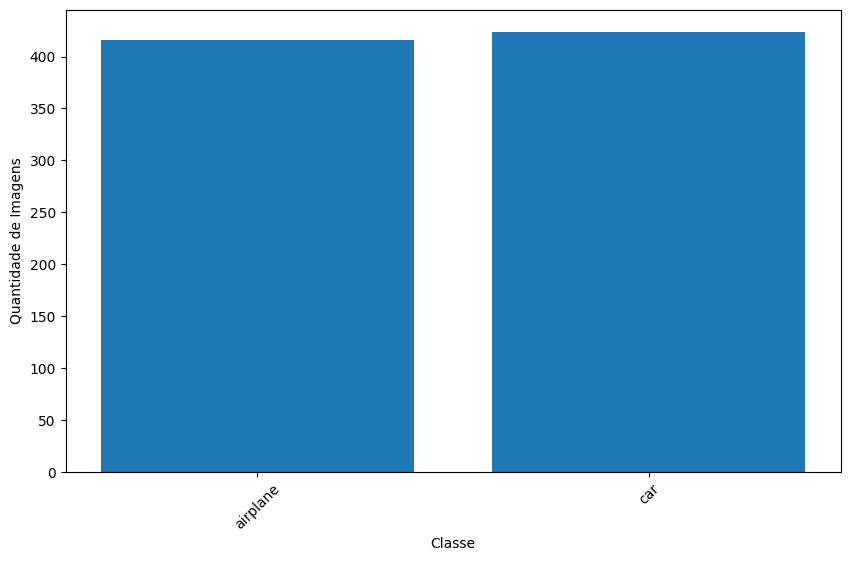

In [15]:
# Conta a quantidade de imagens para cada classe no conjunto de treinamento
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))

# Plotar o histograma
class_names = ['airplane', 'car']

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), tick_label=class_names)
plt.xlabel('Classe')
plt.ylabel('Quantidade de Imagens')
#plt.title('Quantidade de Imagens por Classe no Conjunto de Treinamento Fashion')
plt.xticks(rotation=45)
plt.show()

In [27]:
def create_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Correção na forma de definir os parâmetros do otimizador
    optimizer = Adam(learning_rate=0.001, beta_1=0.95, beta_2=0.9999, epsilon=1e-8, amsgrad=True)

    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

    return model

In [28]:
# define o número de folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# lista para armazenar os históricos e as pontuações de cada fold
histories = []

# lista para armazenar cada modelo
models = []

# executa a validação cruzada
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    x_train2, x_val = X_train[train_index], X_train[val_index]
    y_train2, y_val = y_train[train_index], y_train[val_index]
    
    # cria e treina o modelo
    model = create_model()
    history = model.fit(x_train2, y_train2, epochs=20, batch_size=32,
                        validation_data=(x_val, y_val), verbose=1)
    
    models.append(model)
    
    # armazenar o historico do fold
    histories.append(history.history)
    
    # avalia e exibe a pontuação
    score = model.evaluate(x_val, y_val, verbose=0)
    print(f'Fold {fold + 1} - Acurácia: {score[1]:.4f}')

Epoch 1/20


/home/lorran/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4228 - loss: 14.9181 - val_accuracy: 0.5476 - val_loss: 0.9418
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6629 - loss: 0.7139 - val_accuracy: 0.6429 - val_loss: 0.6830
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7263 - loss: 0.5389 - val_accuracy: 0.7500 - val_loss: 0.4982
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7464 - loss: 0.4957 - val_accuracy: 0.8095 - val_loss: 0.4463
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8314 - loss: 0.4008 - val_accuracy: 0.7917 - val_loss: 0.4167
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8525 - loss: 0.3209 - val_accuracy: 0.8155 - val_loss: 0.4209
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8807 - loss: 0.2941 - val_accuracy: 0.8155 - val_loss: 0.3859
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9232 - loss: 0.2065 - val_accuracy: 0.8036 - val_loss: 0

: 

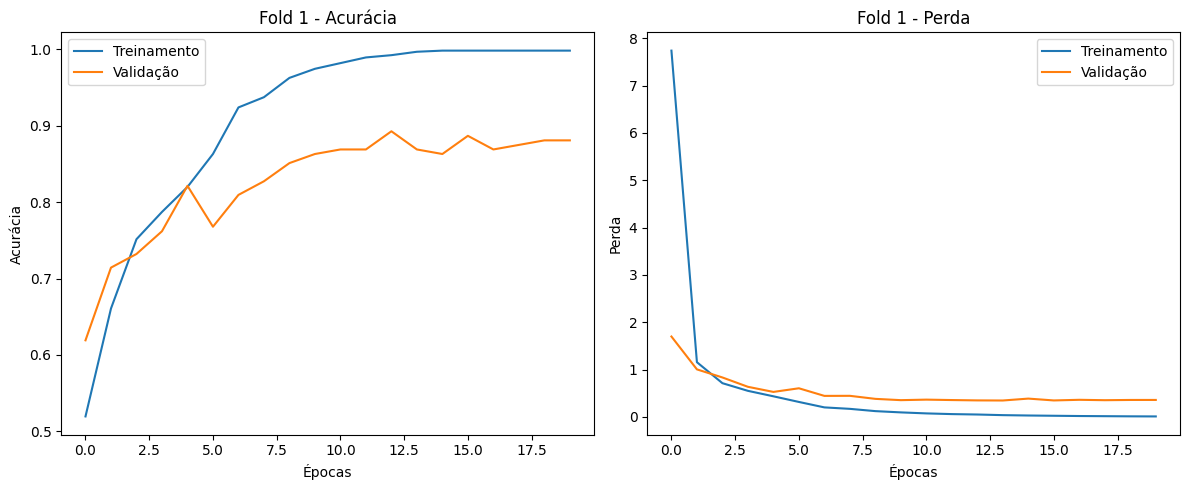

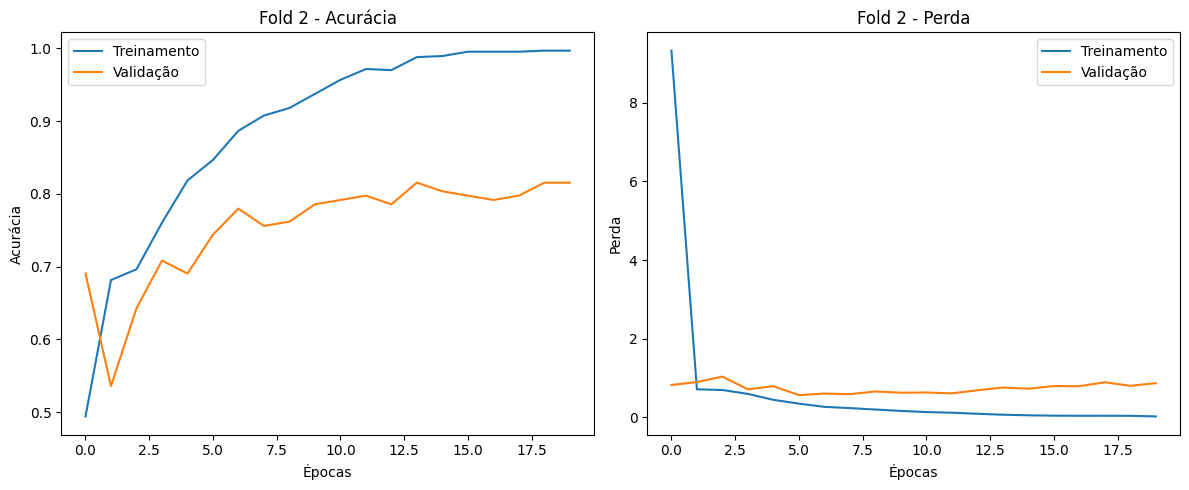

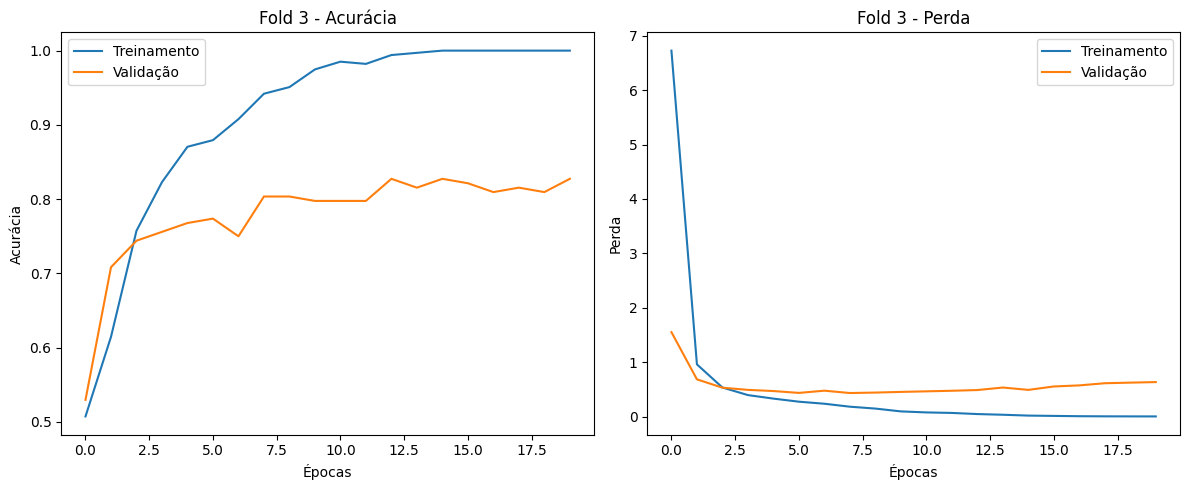

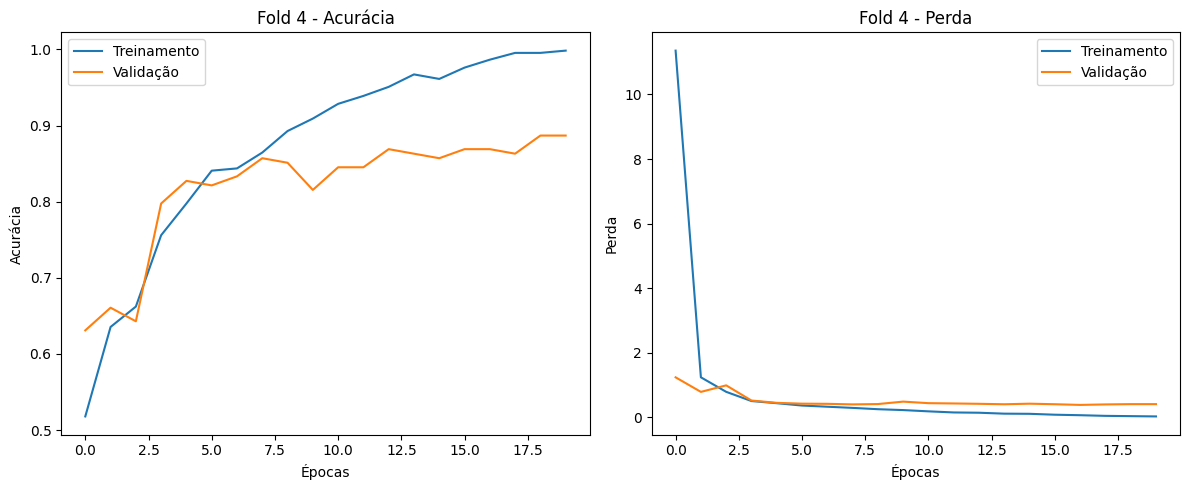

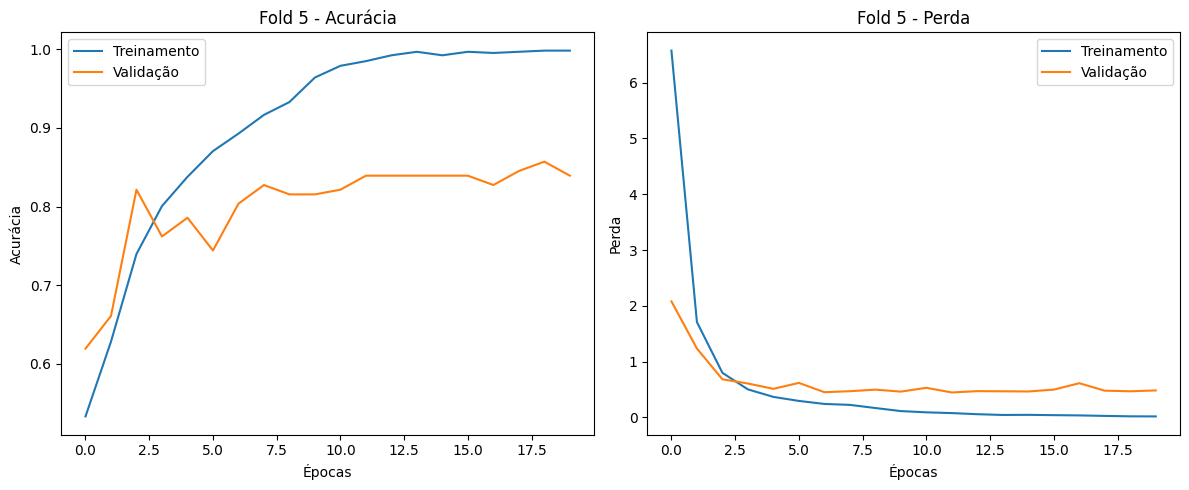

In [22]:
# plota graficos de acurácia e perda para cada fold
for fold, history in enumerate(histories):
    plt.figure(figsize=(12, 5))
    
    # plota acuracia
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Treinamento')
    plt.plot(history['val_accuracy'], label='Validação')
    plt.title(f'Fold {fold + 1} - Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    
    # plotar perda
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Treinamento')
    plt.plot(history['val_loss'], label='Validação')
    plt.title(f'Fold {fold + 1} - Perda')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


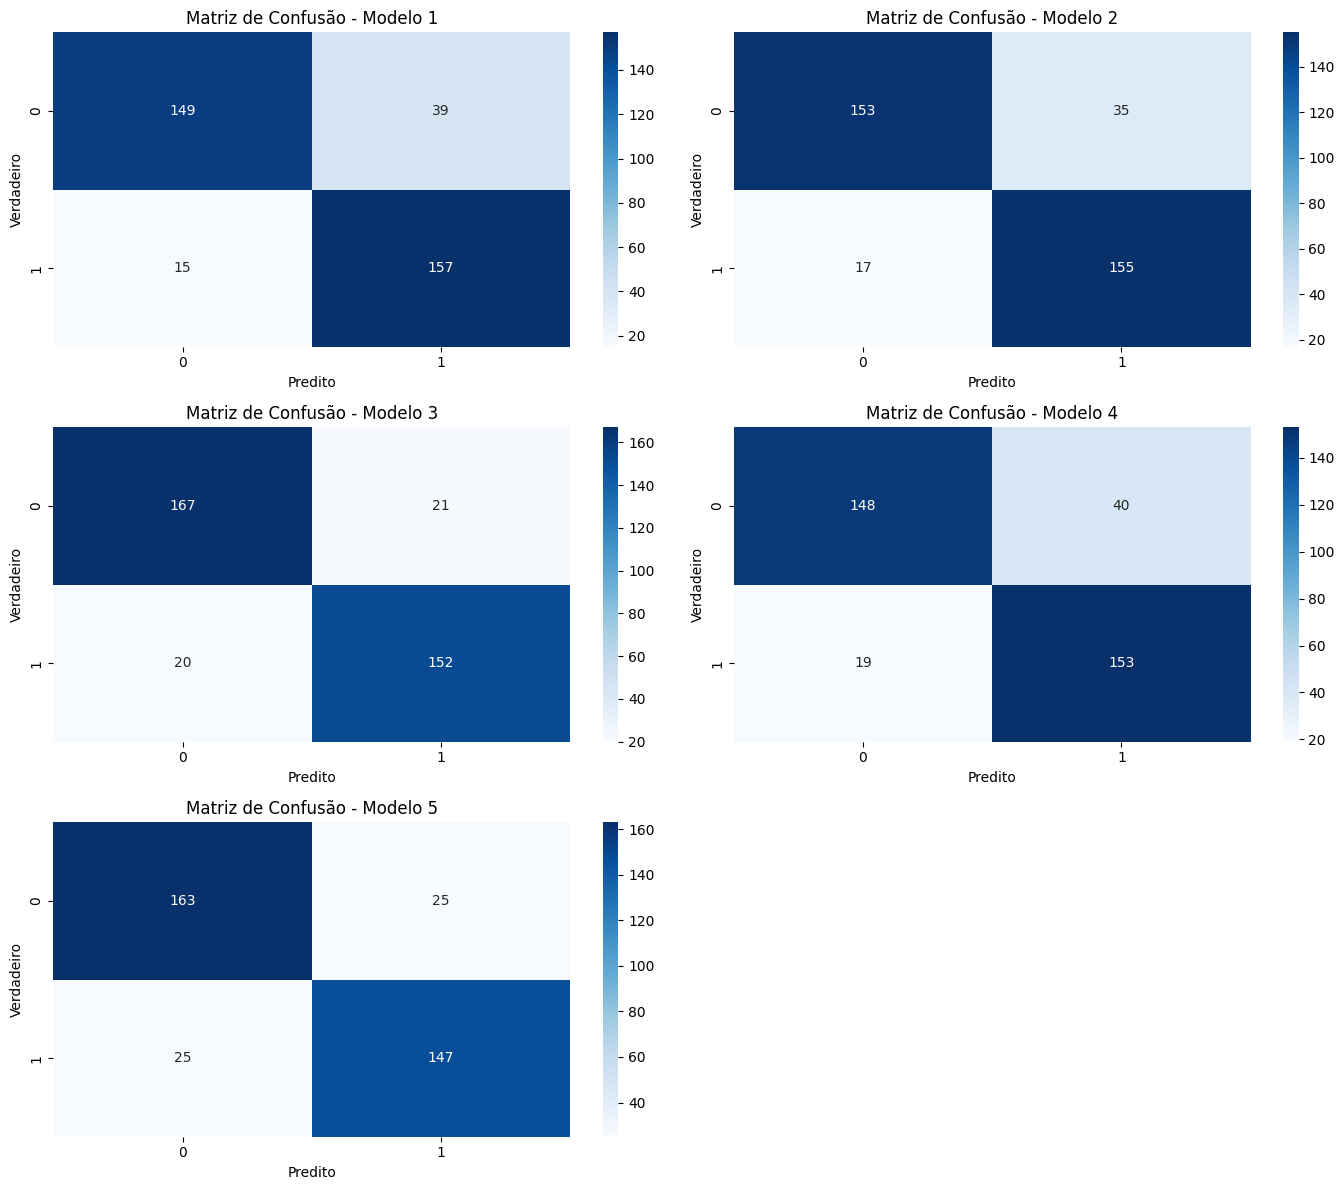

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Relatório de Classificação - Modelo 1:

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       188
           1       0.80      0.91      0.85       172

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Relatório de Classificação - Modelo 2:

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       188
           1       0.82      0.90      0.86       172

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Relatório de Classificação - Modelo 3:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       188


In [26]:
num_models = len(models)

# cria a figura principal com subplots organizados em uma grade de 2x2
plt.figure(figsize=(14, 12))

for i, md in enumerate(models):
    y_pred = md.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Converter previsões para classes

    # cria a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # subplot para cada matriz de confusão
    plt.subplot(3, 2, i + 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(2), yticklabels=np.arange(2))
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - Modelo {i + 1}')


plt.tight_layout()
plt.show()

# calcula e imprime o relatório de classificação para cada modelo
for i, md in enumerate(models):
    y_pred = md.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Converter previsões para classes
    report = classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(2)])
    print(f'Relatório de Classificação - Modelo {i + 1}:\n')
    print(report)